In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from io import StringIO

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 6.4 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=6fb50ed52a4707a2a48e5036fdd37ec4eed39180478923236135aeac4b9239e7
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


### Scrap data from webpage.

In [4]:
from urllib.request import urlopen
url = "https://en.wikipedia.org/wiki/Category:Suburbs_in_Kuala_Lumpur"
html = urlopen(url)

In [5]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [6]:
neighborhoodList = []

In [7]:
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [8]:
k_valley=pd.DataFrame({"Neighborhood": neighborhoodList})

k_valley.head()

,Neighborhood
0,Alam Damai
1,"Ampang, Kuala Lumpur"
2,Bandar Menjalara
3,Bandar Sri Permaisuri
4,Bandar Tasik Selatan


In [9]:
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(Neighborhood): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="foursquare_agent") 
          
        return geolocator.geocode(Neighborhood) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(Neighborhood)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (k_valley["Neighborhood"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [10]:
# now add this column to dataframe 
k_valley["Longitude"] = longitude 
k_valley["Latitude"] = latitude 
  
k_valley 

,Neighborhood,Longitude,Latitude
0,Alam Damai,101.740735,3.064708
1,"Ampang, Kuala Lumpur",101.732250,3.152135
2,Bandar Menjalara,101.630030,3.193954
3,Bandar Sri Permaisuri,101.710872,3.101158
4,Bandar Tasik Selatan,101.711447,3.076097
...,...,...,...
65,Taman Tun Dr Ismail,101.624919,3.150808
66,Taman U-Thant,101.729820,3.156499
67,Taman Wahyu,101.672211,3.214504
68,Titiwangsa,101.695933,3.173145


In [11]:
address = 'Kuala Lumpur,Malaysia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

3.1516964 101.6942371


In [12]:
map_Klangvalley = folium.Map(location=[3.1516964,101.6942371],zoom_start=12)

for lat,lng,neighbourhood in zip(k_valley['Latitude'],k_valley['Longitude'],k_valley['Neighborhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=8,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Klangvalley)
map_Klangvalley

In [13]:
# save the map as HTML file
map_Klangvalley.save('map_Klangvalley.html')

## Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'TINHVXAMBKQU0EYTTLBELMJ5KD2LBKD55BCNFJ1GUPQXR0MM' # your Foursquare ID
CLIENT_SECRET = 'F1A12TH2Z2WXI01OM22LBYJGUBX01ITRMBP24VDJRETGHUAC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TINHVXAMBKQU0EYTTLBELMJ5KD2LBKD55BCNFJ1GUPQXR0MM
CLIENT_SECRET:F1A12TH2Z2WXI01OM22LBYJGUBX01ITRMBP24VDJRETGHUAC


### Top 50 venues that are within a radius of 2000 meters.

In [15]:
search_query = 'Bakery'
print(search_query + ' .... OK!')

Bakery .... OK!


In [16]:
radius = 2000
LIMIT = 50

venues = []

for lat, long, neighborhood in zip(k_valley['Latitude'], k_valley['Longitude'], k_valley['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [17]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'Name', 'Latitude', 'Longitude', 'Category']

print(venues_df.shape)
venues_df.head(10)

(3378, 7)


,Neighbourhood,Latitude,Longitude,Name,Latitude,Longitude,Category
0,Alam Damai,3.064708,101.740735,Pengedar Shaklee Kuala Lumpur,3.061235,101.740696,Supplement Shop
1,Alam Damai,3.064708,101.740735,Alam Damai Recreational Park,3.066424,101.740265,Other Great Outdoors
2,Alam Damai,3.064708,101.740735,Ivy Sekinchan Seafood Noodle House 适耕莊特制魚丸海鲜面,3.065749,101.748718,Noodle House
3,Alam Damai,3.064708,101.740735,Jc Deli 皆喜食坊,3.058397,101.748560,Food & Drink Shop
4,Alam Damai,3.064708,101.740735,"Alam Damai, Damai Jasa",3.069329,101.744512,Park
5,Alam Damai,3.064708,101.740735,Machi Noodle 妈子面,3.057695,101.746635,Noodle House
6,Alam Damai,3.064708,101.740735,Bukit Besi Hiking Trail,3.073725,101.733300,Trail
7,Alam Damai,3.064708,101.740735,Big Tree Lin Kee Chan Sow Lin Steam Fish Head ...,3.077381,101.739140,Chinese Restaurant
8,Alam Damai,3.064708,101.740735,Tealive,3.070599,101.749615,Bubble Tea Shop
9,Alam Damai,3.064708,101.740735,【Lensen 点心】茶餐室,3.074036,101.745661,Chinese Breakfast Place


#### Find unique categories

In [18]:
uc = set(venues_df['Category'])
print(uc)

{'Volleyball Court', 'Korean Restaurant', 'Wings Joint', 'Soccer Field', 'Badminton Court', 'Miscellaneous Shop', 'Theater', 'Stationery Store', 'Cosmetics Shop', 'Gas Station', 'Historic Site', 'Market', 'Road', 'Halal Restaurant', 'Yoga Studio', 'Café', 'Gym Pool', 'Camera Store', 'Bagel Shop', 'Smoke Shop', 'Club House', 'Plaza', 'Cycle Studio', 'Basketball Court', 'Szechuan Restaurant', 'Night Market', 'Auto Garage', 'Rest Area', 'Border Crossing', 'Scandinavian Restaurant', 'BBQ Joint', 'Soup Place', 'Piano Bar', 'Hotel Pool', 'Gym / Fitness Center', 'Event Space', 'Bridge', 'Other Great Outdoors', 'Supplement Shop', 'Accessories Store', 'Temple', 'Outlet Store', 'Chinese Breakfast Place', 'Massage Studio', 'Garden Center', 'Martial Arts School', 'Pizza Place', 'Indonesian Restaurant', 'Whisky Bar', 'Brewery', 'Hill', 'Concert Hall', 'Racetrack', 'American Restaurant', 'Indian Restaurant', 'Furniture / Home Store', 'Indie Movie Theater', 'Museum', 'Mediterranean Restaurant', 'Beer

In [19]:
"Neighborhood" in venues_df['Category'].unique()

True

### Perform one-hot encoding to analyze neighbourhood.

In [20]:
kl_1hot = pd.get_dummies(venues_df[['Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
kl_1hot['Neighbourhood'] = venues_df['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [kl_1hot.columns[-1]] + kl_1hot.columns[:-1].values.tolist()
kl_1hot = kl_1hot[fixed_columns]

kl_1hot.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,Alam Damai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alam Damai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alam Damai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alam Damai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alam Damai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [21]:
kl_grouped = kl_1hot.groupby(["Neighbourhood"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(69, 262)


,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,Alam Damai,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.02,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,"Ampang, Kuala Lumpur",0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.06,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Bandar Menjalara,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.06,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,Bandar Sri Permaisuri,0.0,0.0,0.0,0.0,0.02,0.00,0.00,0.10,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Bandar Tasik Selatan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.12,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Taman Tun Dr Ismail,0.0,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
65,Taman U-Thant,0.0,0.0,0.0,0.0,0.02,0.00,0.00,0.02,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
66,Taman Wahyu,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.14,0.0,...,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
67,Titiwangsa,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.06,0.0,...,0.0,0.02,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [22]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [23]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = kl_grouped['Neighbourhood']

for ind in np.arange(kl_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(kl_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head(50)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alam Damai,Chinese Restaurant,Malay Restaurant,Café,Noodle House,Coffee Shop,Restaurant,Indian Restaurant,Cantonese Restaurant,Convenience Store,Breakfast Spot
1,"Ampang, Kuala Lumpur",Hotel,Malay Restaurant,Asian Restaurant,Breakfast Spot,Juice Bar,Coffee Shop,Middle Eastern Restaurant,Golf Course,Art Gallery,Resort
2,Bandar Menjalara,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Park,Restaurant,Grocery Store,Mosque,Mountain
3,Bandar Sri Permaisuri,Chinese Restaurant,Asian Restaurant,Indonesian Restaurant,Noodle House,Gas Station,Seafood Restaurant,Pizza Place,Fast Food Restaurant,Bakery,Lake
4,Bandar Tasik Selatan,Asian Restaurant,Burger Joint,Chinese Restaurant,Malay Restaurant,Ice Cream Shop,Convenience Store,Sandwich Place,Cantonese Restaurant,Gym Pool,Comfort Food Restaurant
5,Bandar Tun Razak,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Flea Market,Bakery,Malay Restaurant,Burger Joint,Gas Station,Lake,Market
6,Bangsar,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
7,Bangsar Park,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
8,Bangsar South,Japanese Restaurant,Hotel,Restaurant,Coffee Shop,Malay Restaurant,Movie Theater,Clothing Store,Shopping Mall,Chinese Restaurant,Juice Bar
9,Batu 11 Cheras,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Coffee Shop,Food Truck,Lake,Dim Sum Restaurant,Steakhouse,Café,Cantonese Restaurant


In [24]:
len(kl_grouped[kl_grouped["Bakery"] > 0])

39

### New DataFrame for Bakery data only

In [25]:
kl_bake = kl_grouped[["Neighbourhood","Bakery"]]

In [26]:
kl_bake.head(70)

,Neighbourhood,Bakery
0,Alam Damai,0.02
1,"Ampang, Kuala Lumpur",0.02
2,Bandar Menjalara,0.00
3,Bandar Sri Permaisuri,0.04
4,Bandar Tasik Selatan,0.02
5,Bandar Tun Razak,0.04
6,Bangsar,0.00
7,Bangsar Park,0.00
8,Bangsar South,0.04
9,Batu 11 Cheras,0.02


### Elbow Method for optimal value of k in KMeans

In [27]:
kl_grouped_clustering = kl_bake.drop('Neighbourhood', 1)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [30]:
max_range = 12 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for kl_clusters in range(2, max_range) :
    
    # Run k-means clustering
    kl_gc = kl_grouped_clustering
    kmeans = KMeans(n_clusters =kl_clusters, init = 'k-means++', random_state = 0).fit_predict(kl_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kl_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kl_clusters)
    scores.append(score)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clu

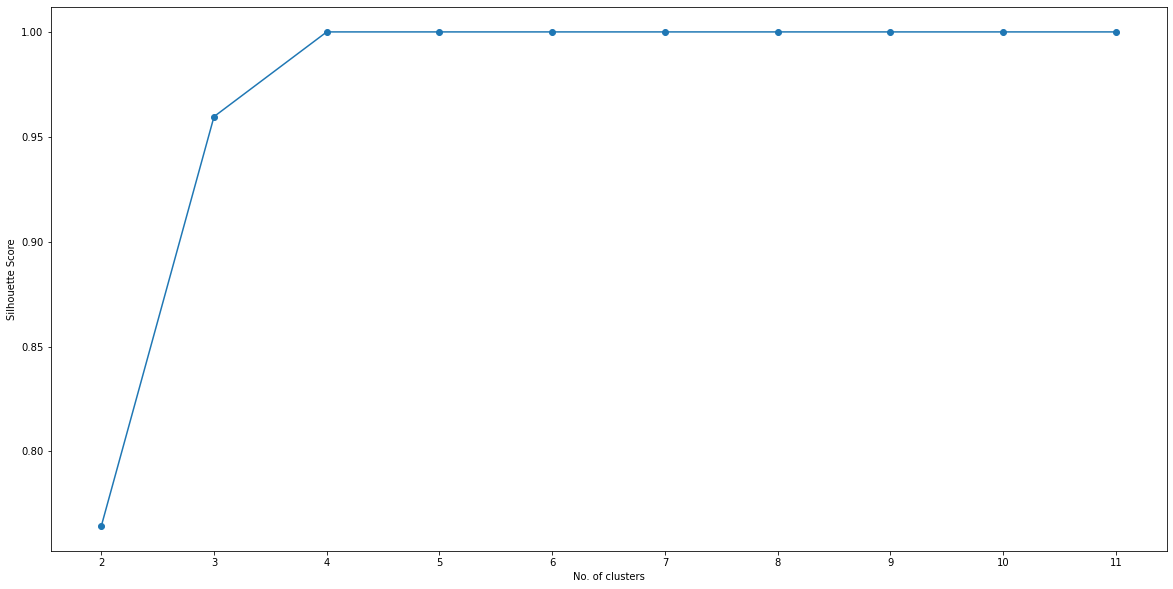

In [31]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

#### From the graph the optimal number is found to be 4 using the Elbow Method.

In [32]:
opt_value =4

In [34]:
kl_clusters = opt_value

# Run k-means clustering
kl_gc = kl_grouped_clustering
kmeans = KMeans(n_clusters = kl_clusters, init = 'k-means++', random_state = 0).fit(kl_gc)

In [35]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#### Final version of dataframe containing all the necessary data.

In [36]:
kl_final = k_valley
kl_final = kl_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')
kl_final.dropna(inplace = True)
kl_final['Cluster Labels'] = kl_final['Cluster Labels'].astype(int)
kl_final.head(50)

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alam Damai,101.740735,3.064708,2,Chinese Restaurant,Malay Restaurant,Café,Noodle House,Coffee Shop,Restaurant,Indian Restaurant,Cantonese Restaurant,Convenience Store,Breakfast Spot
1,"Ampang, Kuala Lumpur",101.732250,3.152135,2,Hotel,Malay Restaurant,Asian Restaurant,Breakfast Spot,Juice Bar,Coffee Shop,Middle Eastern Restaurant,Golf Course,Art Gallery,Resort
2,Bandar Menjalara,101.630030,3.193954,1,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Park,Restaurant,Grocery Store,Mosque,Mountain
3,Bandar Sri Permaisuri,101.710872,3.101158,0,Chinese Restaurant,Asian Restaurant,Indonesian Restaurant,Noodle House,Gas Station,Seafood Restaurant,Pizza Place,Fast Food Restaurant,Bakery,Lake
4,Bandar Tasik Selatan,101.711447,3.076097,2,Asian Restaurant,Burger Joint,Chinese Restaurant,Malay Restaurant,Ice Cream Shop,Convenience Store,Sandwich Place,Cantonese Restaurant,Gym Pool,Comfort Food Restaurant
5,Bandar Tun Razak,101.712467,3.089695,0,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Flea Market,Bakery,Malay Restaurant,Burger Joint,Gas Station,Lake,Market
6,Bangsar,101.669440,3.130830,1,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
7,Bangsar Park,101.669440,3.130830,1,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
8,Bangsar South,101.666729,3.112973,0,Japanese Restaurant,Hotel,Restaurant,Coffee Shop,Malay Restaurant,Movie Theater,Clothing Store,Shopping Mall,Chinese Restaurant,Juice Bar
9,Batu 11 Cheras,101.773369,3.041331,2,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Coffee Shop,Food Truck,Lake,Dim Sum Restaurant,Steakhouse,Café,Cantonese Restaurant


### Display visualization of clusters.

In [37]:

import matplotlib.cm as cm
import matplotlib.colors as colors

In [38]:



map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(kl_clusters)
ys = [i + x + (i*x)**2 for i in range(kl_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(kl_final['Latitude'],kl_final['Longitude'], kl_final['Neighborhood'], 
                                  kl_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [39]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### Now examine all four clusters.

In [42]:
val =1
kl_final.loc[kl_final['Cluster Labels'] == (val - 1),kl_final.columns[[0] + np.arange(4, kl_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bandar Sri Permaisuri,Chinese Restaurant,Asian Restaurant,Indonesian Restaurant,Noodle House,Gas Station,Seafood Restaurant,Pizza Place,Fast Food Restaurant,Bakery,Lake
5,Bandar Tun Razak,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Flea Market,Bakery,Malay Restaurant,Burger Joint,Gas Station,Lake,Market
8,Bangsar South,Japanese Restaurant,Hotel,Restaurant,Coffee Shop,Malay Restaurant,Movie Theater,Clothing Store,Shopping Mall,Chinese Restaurant,Juice Bar
14,Bukit Kiara,Skate Park,Asian Restaurant,Indian Restaurant,Ice Cream Shop,Food Truck,Malay Restaurant,Lounge,Japanese Restaurant,Golf Course,Bakery
20,Damansara Heights,Japanese Restaurant,Café,Italian Restaurant,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Asian Restaurant,Grocery Store,Yoga Studio,Bakery
23,Desa Petaling,Chinese Restaurant,Asian Restaurant,Burger Joint,Hotpot Restaurant,Japanese Restaurant,Gym,Bakery,Malay Restaurant,Coffee Shop,Café
29,Kampung Datuk Keramat,Hotel,Malay Restaurant,Italian Restaurant,Coffee Shop,Seafood Restaurant,Café,Grocery Store,Art Gallery,French Restaurant,Hotel Bar
43,Salak South,Chinese Restaurant,Asian Restaurant,Burger Joint,Gas Station,Gym,Hotpot Restaurant,Bakery,Malay Restaurant,Indonesian Restaurant,Dumpling Restaurant
48,Setiawangsa,Malay Restaurant,Asian Restaurant,Seafood Restaurant,Coffee Shop,Bakery,Indonesian Restaurant,Middle Eastern Restaurant,Pharmacy,Juice Bar,Breakfast Spot
50,Sri Hartamas,Japanese Restaurant,Korean Restaurant,Café,Vegetarian / Vegan Restaurant,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Spa,Bakery,Restaurant


In [43]:
val =2
kl_final.loc[kl_final['Cluster Labels'] == (val - 1),kl_final.columns[[0] + np.arange(4, kl_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bandar Menjalara,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Park,Restaurant,Grocery Store,Mosque,Mountain
6,Bangsar,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
7,Bangsar Park,Indian Restaurant,Bar,Ice Cream Shop,Burger Joint,Clothing Store,Spa,Shopping Mall,Coffee Shop,Steakhouse,Boutique
10,"Batu, Kuala Lumpur",Chinese Restaurant,Malay Restaurant,Seafood Restaurant,Asian Restaurant,Food Truck,Restaurant,Motorcycle Shop,Flea Market,Noodle House,Spa
11,Brickfields,Hotel,Indian Restaurant,Clothing Store,French Restaurant,Café,Shopping Mall,Coffee Shop,Cocktail Bar,Hotel Bar,South Indian Restaurant
12,Bukit Bintang,Hotel,Café,Spa,Italian Restaurant,Shopping Mall,Boutique,Japanese Restaurant,Clothing Store,Hainan Restaurant,Science Museum
15,Bukit Nanas,Hotel,Cocktail Bar,Bar,Cosmetics Shop,Building,Boutique,Monument / Landmark,Breakfast Spot,Sushi Restaurant,Dance Studio
17,Bukit Tunku,Japanese Restaurant,Coffee Shop,Pool,Café,Art Gallery,Restaurant,Bistro,Noodle House,Spa,Hotel
19,Chow Kit,Hotel,Malay Restaurant,Coffee Shop,Clothing Store,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Theater,Chinese Restaurant,IT Services
21,Damansara Town Centre,Seafood Restaurant,Chinese Restaurant,Racetrack,Coffee Shop,Malay Restaurant,Shopping Mall,BBQ Joint,Convenience Store,Roof Deck,Electronics Store


In [44]:
val =3
kl_final.loc[kl_final['Cluster Labels'] == (val - 1),kl_final.columns[[0] + np.arange(4, kl_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alam Damai,Chinese Restaurant,Malay Restaurant,Café,Noodle House,Coffee Shop,Restaurant,Indian Restaurant,Cantonese Restaurant,Convenience Store,Breakfast Spot
1,"Ampang, Kuala Lumpur",Hotel,Malay Restaurant,Asian Restaurant,Breakfast Spot,Juice Bar,Coffee Shop,Middle Eastern Restaurant,Golf Course,Art Gallery,Resort
4,Bandar Tasik Selatan,Asian Restaurant,Burger Joint,Chinese Restaurant,Malay Restaurant,Ice Cream Shop,Convenience Store,Sandwich Place,Cantonese Restaurant,Gym Pool,Comfort Food Restaurant
9,Batu 11 Cheras,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Coffee Shop,Food Truck,Lake,Dim Sum Restaurant,Steakhouse,Café,Cantonese Restaurant
13,Bukit Jalil,Coffee Shop,Café,Japanese Restaurant,Asian Restaurant,Massage Studio,Middle Eastern Restaurant,Golf Course,Ice Cream Shop,Vegetarian / Vegan Restaurant,Restaurant
16,Bukit Petaling,Hotel,Café,Hotel Bar,Indian Restaurant,Juice Bar,South Indian Restaurant,Coffee Shop,Convenience Store,Burrito Place,Performing Arts Venue
18,"Cheras, Kuala Lumpur",Chinese Restaurant,Malay Restaurant,Asian Restaurant,Indonesian Restaurant,Seafood Restaurant,Food Truck,Noodle House,Pizza Place,Market,Nightclub
26,"Jalan Cochrane, Kuala Lumpur",Asian Restaurant,Nightclub,Furniture / Home Store,Burger Joint,Café,Korean Restaurant,Chinese Restaurant,Shopping Mall,Coffee Shop,Noodle House
30,Kampung Padang Balang,Malay Restaurant,Asian Restaurant,Convenience Store,Steakhouse,Chinese Restaurant,Snack Place,Restaurant,Sushi Restaurant,Halal Restaurant,Gym
32,Kepong Baru,Chinese Restaurant,Asian Restaurant,Dessert Shop,Thai Restaurant,Food Truck,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Restaurant,Snack Place


In [45]:
val =4
kl_final.loc[kl_final['Cluster Labels'] == (val - 1),kl_final.columns[[0] + np.arange(4, kl_final.shape[1]).tolist()]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,KL Eco City,Cosmetics Shop,Ice Cream Shop,Department Store,Bakery,Clothing Store,Juice Bar,Movie Theater,Shopping Mall,Coffee Shop,Japanese Restaurant
61,Taman OUG,Café,Chinese Restaurant,Bakery,Coffee Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Asian Restaurant,Cantonese Restaurant,Night Market,Supermarket


#### The most suitable neighbourhood to start a bakery are present in Cluster 1. The places such as Bandar Sri Permaisuri, Taman Desa, Sri Hartamas, Desa Petaling, Damansara Heights and Bukit Kiara are most suitable with less competition. 